In [242]:
import base64
import cartopy.crs as ccrs
import calendar
import glob
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score

from netCDF4 import Dataset
from ipyleaflet import Map, basemaps, basemap_to_tiles, Rectangle, ImageOverlay
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D

In [113]:
dataset = Dataset("../era5/era5-nordics-temperature-2000-01.nc")

In [114]:
dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2018-10-30 23:42:15 GMT by grib_to_netcdf-2.7.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -o /cache/data1/adaptor.mars.internal-1540942857.3291779-776-7-67426843-5581-445e-b5ba-1e731644d3fe.nc /cache/tmp/67426843-5581-445e-b5ba-1e731644d3fe-adaptor.mars.internal-1540942857.3294854-776-3-tmp.grib
    dimensions(sizes): longitude(111), latitude(73), time(744)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 d2m(time,latitude,longitude), int16 t2m(time,latitude,longitude)
    groups: 

In [115]:
dataset["t2m"]

<class 'netCDF4._netCDF4.Variable'>
int16 t2m(time, latitude, longitude)
    scale_factor: 0.0007077255622733728
    add_offset: 261.9837846259884
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: 2 metre temperature
unlimited dimensions: 
current shape = (744, 73, 111)
filling off

In [116]:
lats.min(), lats.max(), lons.min(), lons.max()

(53.5, 71.5, 4.5, 32.0)

In [117]:
t2m = dataset.variables["t2m"]

In [118]:
t2m

<class 'netCDF4._netCDF4.Variable'>
int16 t2m(time, latitude, longitude)
    scale_factor: 0.0007077255622733728
    add_offset: 261.9837846259884
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: 2 metre temperature
unlimited dimensions: 
current shape = (744, 73, 111)
filling off

In [129]:
t2m = []

for y in range(2001, 2018):
    for m in range(1, 13):
        print(m)
        dataset = Dataset("../era5/era5-nordics-temperature-2000-%02d.nc" % m)
        t2m.append(dataset.variables["t2m"])

1
2
3
4
5
6
7
8
9
10
11
12


In [130]:
t2m = np.concatenate(t2m, axis=0)

In [173]:
t2m_mean = np.mean(t2m, axis=0) - 273.15
t2m_max = np.max(t2m, axis=0) - 273.15
t2m_min = np.min(t2m, axis=0) - 273.15

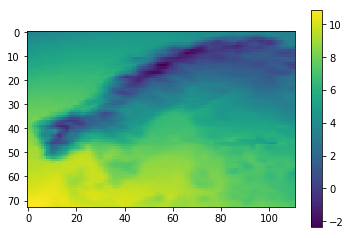

In [174]:
plt.imshow(t2m_mean)
plt.colorbar()

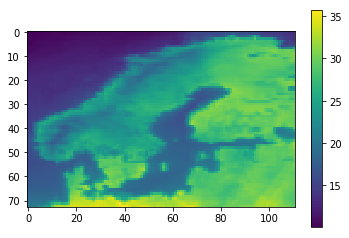

In [176]:
plt.imshow(t2m_max )
plt.colorbar()

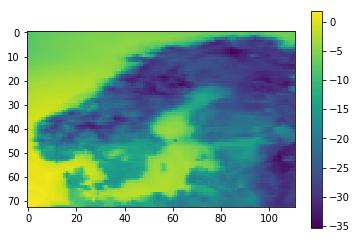

In [177]:
plt.imshow(t2m_min)
plt.colorbar()

In [178]:
t2m_min.shape

(73, 111)

In [179]:
pine = Dataset("pine.nc")

In [180]:
pine.variables["volume"]

<class 'netCDF4._netCDF4.Variable'>
float32 volume(latitude, longitude)
unlimited dimensions: 
current shape = (73, 111)
filling on, default _FillValue of 9.969209968386869e+36 used

In [181]:
volume = pine.variables["volume"][:]

In [182]:
data = [volume.flatten(), t2m_mean.flatten(), t2m_max.flatten(), t2m_min.flatten()]

In [183]:
names = ["volume", "t2m_mean", "t2m_max", "t2m_min"]

In [184]:
df_pine = pd.DataFrame.from_items(zip(names, data))

/home/sato/dev/cc/sandbox-fabio/python-notebooks/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


In [185]:
df_pine.dropna(inplace=True)

In [191]:
df_pine = df_pine[df_pine["volume"] > 0]

In [245]:
df_pine

,volume,t2m_mean,t2m_max,t2m_min,category
1403,0.948005,0.678102,23.236933,-26.329943,mid-highhigh
1505,0.903757,0.174660,22.186673,-27.433237,mid-highhigh
1513,0.710386,0.753452,23.151230,-26.007928,mid
1515,0.203855,0.997654,24.480956,-25.789241,low
1516,0.872032,1.081710,25.348099,-25.765886,mid-highhigh
1517,1.000000,1.105542,26.201934,-25.847982,mid-highhigh
1617,0.679887,0.771629,22.917543,-28.402164,mid
1618,0.364010,0.979921,23.046364,-27.419841,low-mid
1621,0.488937,0.998827,22.998455,-26.226615,low-mid
1622,0.274764,0.959608,22.874958,-26.316496,low-mid


/home/sato/dev/cc/sandbox-fabio/python-notebooks/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


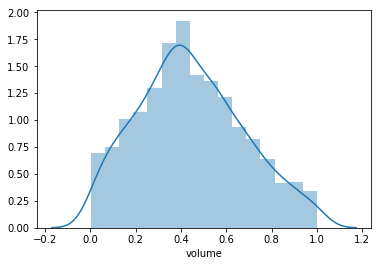

In [240]:
sns.distplot(df_pine["volume"])

/home/sato/dev/cc/sandbox-fabio/python-notebooks/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


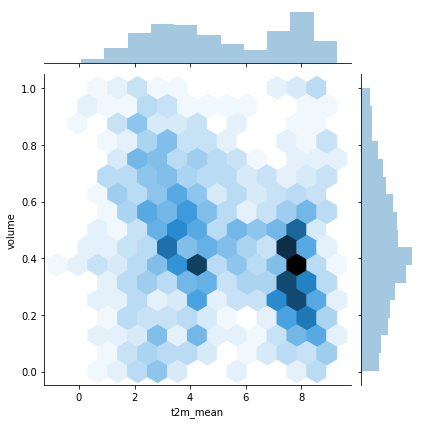

In [211]:
sns.jointplot("t2m_mean", "volume", df_pine, kind='hex')

/home/sato/dev/cc/sandbox-fabio/python-notebooks/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


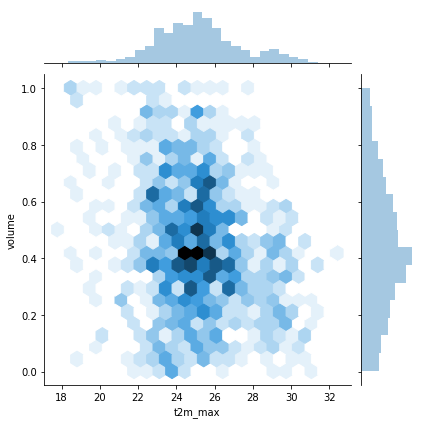

In [212]:
sns.jointplot("t2m_max", "volume", df_pine, kind='hex')

/home/sato/dev/cc/sandbox-fabio/python-notebooks/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


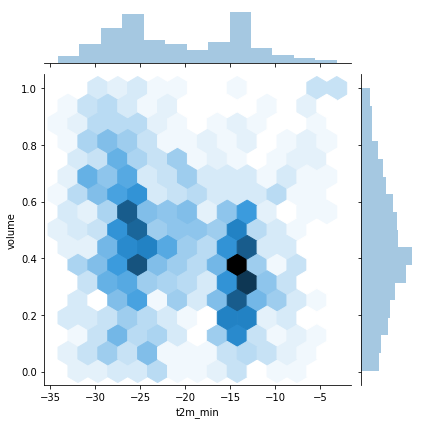

In [213]:
sns.jointplot("t2m_min", "volume", df_pine, kind='hex')

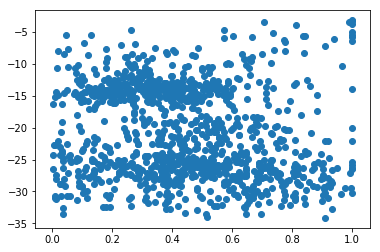

In [244]:
plt.scatter(df_pine["volume"], df_pine["t2m_min"])

In [219]:
df_pine["category"] = pd.cut(df_pine['volume'], bins=[0, 0.25, 0.5, 0.75, 1], include_lowest=True, labels=['low', 'low-mid', 'mid', 'mid-high' 'high'])

/home/sato/dev/cc/sandbox-fabio/python-notebooks/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/home/sato/dev/cc/sandbox-fabio/python-notebooks/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


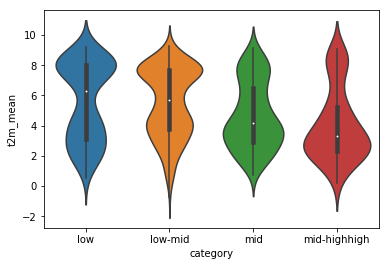

In [220]:
sns.violinplot("category", "t2m_mean", data=df_pine)

/home/sato/dev/cc/sandbox-fabio/python-notebooks/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


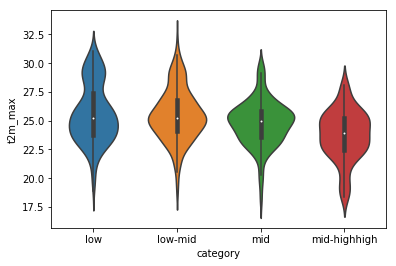

In [222]:
sns.violinplot("category", "t2m_max", data=df_pine)

/home/sato/dev/cc/sandbox-fabio/python-notebooks/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


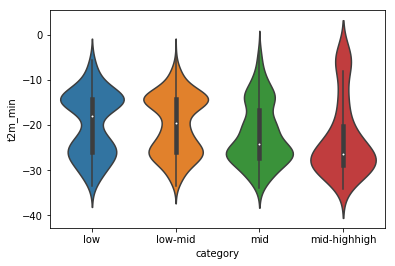

In [223]:
sns.violinplot("category", "t2m_min", data=df_pine)

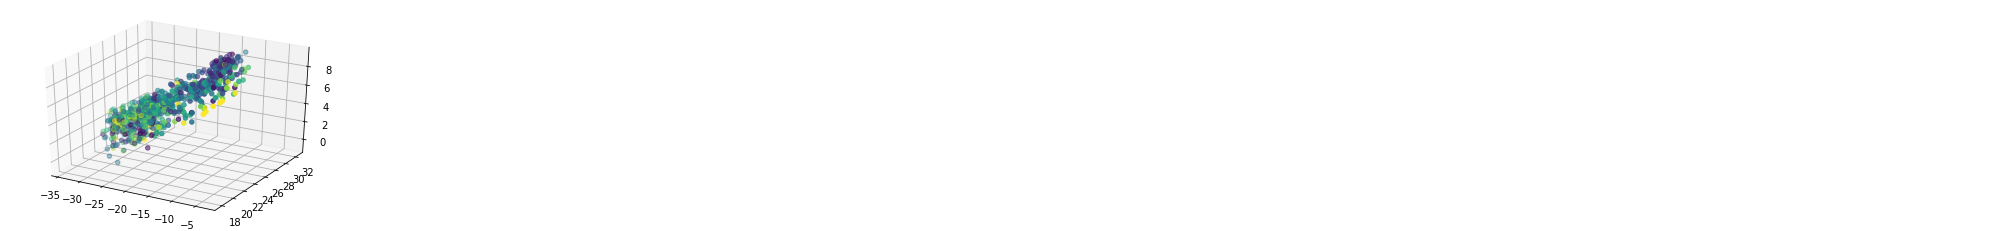

In [238]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pine["t2m_min"], df_pine["t2m_max"], df_pine["t2m_mean"], c = df_pine["volume"])
plt.show()

Distinguish between pine and spruce